### Polynomial_regression 다항 회귀

### When to use Polynomial regression?
- 한 개 변수가 Y값과 비선형적인 관계가 있다고 의심될 때
- 주기적인 패턴을 보이는 Series 데이터(ex. 주가 데이터)
- 모델 자체가 복잡해지면 해결가능한 부분이 많음
    ⇢ SVM, Tree-based Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x, y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size) * 0.5
    return (x, y)

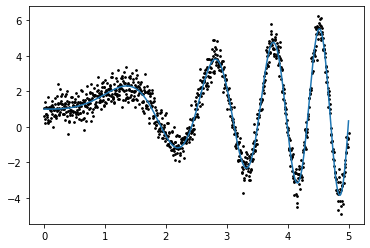

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s = 3, c = 'black')
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

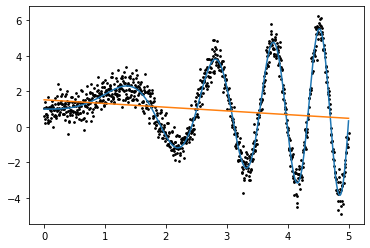

In [8]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [12]:
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

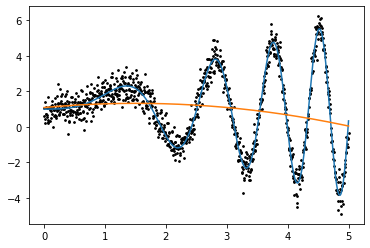

In [13]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = "black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

##### PolynomialFeatures의 degree를 조절하며 확인

In [14]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

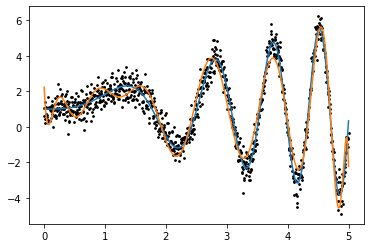

In [15]:
lr = LinearRegression()
lr.fit(X_poly, y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = "black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

### How to optimize
- RMSE의 최소값을 찾자
- Ridge, Lasso, LR 모두 사용
- Degree를 10~50까지 사용
- 결과를 한눈에 정리

In [16]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [18]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree = poly_value)
    X_poly = poly_features.fit_transform(X)
    
    lr = LinearRegression()
    lr.fit(X_poly, y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2004.3480069144382, tolerance: 0.4417550185260514
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1996.981937210501, tolerance: 0.4417550185260514
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915.8781739502983, tolerance: 0.4417550185260514
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1909.6522743604025, tolerance: 0.4417550185260514
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1903.2552577160477, tolerance: 0.4417550185260514
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

In [19]:
import pandas as pd

data = {"poly_range" : poly_range, "lr_rmse" : rmse_lr_list, "lasso_rmse" : rmse_lasso_list, "ridge_rmse" : rmse_ridge_list}
df = pd.DataFrame(data).set_index('poly_range')
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.887750,2.195901,1.911268
11,1.878922,2.204345,1.894290
12,1.628600,2.209460,1.893032
13,1.371610,2.212378,1.865863
14,1.355762,2.214105,1.697102
15,0.907684,2.215081,3.666914
16,0.696740,2.215533,1.504914
17,0.671228,2.215596,1.303790
18,0.697697,2.215378,0.883844


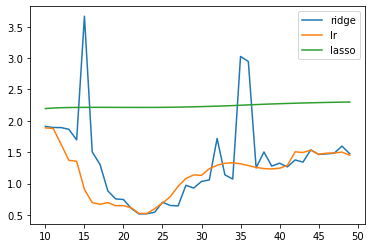

In [20]:
plt.plot(poly_range, df['ridge_rmse'], label = 'ridge')
plt.plot(poly_range, df['lr_rmse'], label = 'lr')
plt.plot(poly_range, df["lasso_rmse"], label = "lasso")
plt.legend()
plt.show()

In [21]:
df.min()

lr_rmse       0.523822
lasso_rmse    2.195901
ridge_rmse    0.517338
dtype: float64

In [22]:
df["ridge_rmse"].sort_values().head()

poly_range
22    0.517338
23    0.519699
24    0.543626
21    0.604636
27    0.644883
Name: ridge_rmse, dtype: float64

In [23]:
poly_features = PolynomialFeatures(degree = 22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept = False)      # PolynomialFeatures에서 intercept를 만들어주기 때문에 여기선 제외하기
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

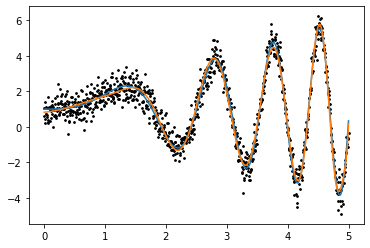

In [24]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s = 3, c = 'black')
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()